In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_defence = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'

In [4]:
data_defence = pd.read_html(url_defence, header=1)[0]
data_defence = data_defence[data_defence['Player'] != 'Player']
data_defence = data_defence.drop(columns=['Rk', 'Matches'])
data_defence

Player   Nation    Pos          Squad                Comp  \
0            Max Aarons  eng ENG     DF   Norwich City  eng Premier League   
1      Yunis Abdelhamid   ma MAR     DF          Reims          fr Ligue 1   
2     Salis Abdul Samed   gh GHA     MF  Clermont Foot          fr Ligue 1   
3       Laurent Abergel   fr FRA     MF        Lorient          fr Ligue 1   
4           Charles Abi   fr FRA     FW  Saint-Étienne          fr Ligue 1   
...                 ...      ...    ...            ...                 ...   
3000   Martín Zubimendi   es ESP     MF  Real Sociedad          es La Liga   
3001   Szymon Żurkowski   pl POL     MF         Empoli          it Serie A   
3002    Martin Ødegaard   no NOR     MF        Arsenal  eng Premier League   
3003        Milan Đurić   ba BIH     FW    Salernitana          it Serie A   
3004      Filip Đuričić   rs SRB  MF,FW       Sassuolo          it Serie A   

         Age  Born   90s  Tkl TklW  ... Mid 3rd.1 Att 3rd.1 Blocks  Sh ShSv  \
0     22-132  2000  31.0   68   37  ...       138        39     85  21    0   
1     34-230  1987  32.1   59   44  ...       164        28     61  26    2   
2     22-051  2000  27.4   55   34  ...       336       108     27   1    0   
3     29-104  1993  31.9  114   72  ...       489       103     52   3    0   
4     22-034  2000   0.5    0    0  ...        11         3      1   0    0   
...      ...   ...   ...  ...  ...  ...       ...       ...    ...  ..  ...   
3000  23-103  1999  27.8   58   30  ...       208        44     37  14    0   
3001  24-233  1997  24.6   68   46  ...       188       112     49   8    0   
3002  23-150  1998  28.9   40   23  ...       242       195     17   1    0   
3003  31-359  1990  23.1    6    4  ...        94       135     10   3    0   
3004  30-106  1992   7.5   12    7  ...        61        29      9   1    0   

     Pass  Int Tkl+Int  Clr Err  
0      64   54     122   69   0  
1      35  103     162  104   0  
2      26   51     106   15   0  
3      49   84     198   11   0  
4       1    0       0    0   0  
...   ...  ...     ...  ...  ..  
3000   23   49     107   61   0  
3001   41   53     121   27   2  
3002   16   20      60   11   1  
3003    7    2       8   34   0  
3004    8    5      17    0   0  

[2890 rows x 31 columns]

In [5]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing = data_passing.drop(columns=['Rk', 'Matches'])
data_passing

Player   Nation    Pos          Squad                Comp  \
0            Max Aarons  eng ENG     DF   Norwich City  eng Premier League   
1      Yunis Abdelhamid   ma MAR     DF          Reims          fr Ligue 1   
2     Salis Abdul Samed   gh GHA     MF  Clermont Foot          fr Ligue 1   
3       Laurent Abergel   fr FRA     MF        Lorient          fr Ligue 1   
4           Charles Abi   fr FRA     FW  Saint-Étienne          fr Ligue 1   
...                 ...      ...    ...            ...                 ...   
3000   Martín Zubimendi   es ESP     MF  Real Sociedad          es La Liga   
3001   Szymon Żurkowski   pl POL     MF         Empoli          it Serie A   
3002    Martin Ødegaard   no NOR     MF        Arsenal  eng Premier League   
3003        Milan Đurić   ba BIH     FW    Salernitana          it Serie A   
3004      Filip Đuričić   rs SRB  MF,FW       Sassuolo          it Serie A   

         Age  Born   90s   Cmp   Att  ... Att.3 Cmp%.3 Ast   xA  A-xA  KP  \
0     22-132  2000  31.0  1043  1387  ...   207   44.4   2  1.4  +0.6  19   
1     34-230  1987  32.1  1239  1506  ...   293   61.1   0  0.3  -0.3   7   
2     22-051  2000  27.4  1532  1671  ...   214   86.0   0  1.1  -1.1  15   
3     29-104  1993  31.9  1282  1571  ...   290   66.6   2  2.8  -0.8  28   
4     22-034  2000   0.5     2     6  ...     0    NaN   0  0.0   0.0   0   
...      ...   ...   ...   ...   ...  ...   ...    ...  ..  ...   ...  ..   
3000  23-103  1999  27.8  1174  1378  ...   209   69.9   1  1.0   0.0  15   
3001  24-233  1997  24.6   704   878  ...    88   61.4   2  1.5  +0.5  19   
3002  23-150  1998  28.9  1253  1481  ...   213   68.1   4  6.3  -2.3  68   
3003  31-359  1990  23.1   408   655  ...    14   64.3   4  2.8  +1.2  29   
3004  30-106  1992   7.5   184   226  ...    14   85.7   1  1.3  -0.3  11   

      1/3 PPA CrsPA Prog  
0      48  36     8   92  
1      77   6     0   87  
2      77  13     1   81  
3     121  17     6  126  
4       0   0     0    0  
...   ...  ..   ...  ...  
3000  113  10     1   97  
3001   51  19     3   65  
3002   91  61     3  140  
3003   18   4     0   30  
3004   13  18     0   34  

[2890 rows x 30 columns]

In [6]:
data_shooting = pd.read_html(url_shooting, header=1)[0]
data_shooting = data_shooting[data_shooting['Player'] != 'Player']
data_shooting = data_shooting.drop(columns=['Rk', 'Matches'])
data_shooting

Player   Nation    Pos          Squad                Comp  \
0            Max Aarons  eng ENG     DF   Norwich City  eng Premier League   
1      Yunis Abdelhamid   ma MAR     DF          Reims          fr Ligue 1   
2     Salis Abdul Samed   gh GHA     MF  Clermont Foot          fr Ligue 1   
3       Laurent Abergel   fr FRA     MF        Lorient          fr Ligue 1   
4           Charles Abi   fr FRA     FW  Saint-Étienne          fr Ligue 1   
...                 ...      ...    ...            ...                 ...   
3000   Martín Zubimendi   es ESP     MF  Real Sociedad          es La Liga   
3001   Szymon Żurkowski   pl POL     MF         Empoli          it Serie A   
3002    Martin Ødegaard   no NOR     MF        Arsenal  eng Premier League   
3003        Milan Đurić   ba BIH     FW    Salernitana          it Serie A   
3004      Filip Đuričić   rs SRB  MF,FW       Sassuolo          it Serie A   

         Age  Born   90s Gls  Sh  ... G/SoT  Dist  FK PK PKatt   xG npxG  \
0     22-132  2000  31.0   0  12  ...  0.00  20.7   0  0     0  0.7  0.7   
1     34-230  1987  32.1   2  18  ...  0.33  18.7   0  0     0  1.2  1.2   
2     22-051  2000  27.4   1  18  ...  0.20  20.3   0  0     0  0.8  0.8   
3     29-104  1993  31.9   0  29  ...  0.00  22.4   0  0     0  2.0  2.0   
4     22-034  2000   0.5   0   0  ...   NaN   NaN   0  0     0  0.0  0.0   
...      ...   ...   ...  ..  ..  ...   ...   ...  .. ..   ...  ...  ...   
3000  23-103  1999  27.8   2  21  ...  0.20  13.7   0  0     0  2.0  2.0   
3001  24-233  1997  24.6   6  46  ...  0.35  18.9   0  0     0  3.9  3.9   
3002  23-150  1998  28.9   6  49  ...  0.30  20.6  12  0     0  4.6  4.6   
3003  31-359  1990  23.1   5  46  ...  0.22   9.8   0  1     1  5.4  4.6   
3004  30-106  1992   7.5   2  18  ...  0.29  15.7   0  0     0  2.0  2.0   

     npxG/Sh  G-xG np:G-xG  
0       0.06  -0.7    -0.7  
1       0.07  +0.8    +0.8  
2       0.04  +0.2    +0.2  
3       0.07  -2.0    -2.0  
4        NaN   0.0     0.0  
...      ...   ...     ...  
3000    0.09   0.0     0.0  
3001    0.09  +2.1    +2.1  
3002    0.09  +1.4    +1.4  
3003    0.10  -0.4    -0.6  
3004    0.11   0.0     0.0  

[2890 rows x 25 columns]

In [7]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [8]:
data_defence.iloc[:, 7:] = data_defence.iloc[:, 7:].astype(float)
data_passing.iloc[:, 7:] = data_passing.iloc[:, 7:].astype(float)
data_shooting.iloc[:, 7:] = data_shooting.iloc[:, 7:].astype(float)

In [9]:
data_defence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 0 to 3004
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Player     2890 non-null   object
 1   Nation     2889 non-null   object
 2   Pos        2890 non-null   object
 3   Squad      2890 non-null   object
 4   Comp       2890 non-null   object
 5   Age        2889 non-null   object
 6   Born       2889 non-null   object
 7   90s        2890 non-null   object
 8   Tkl        2890 non-null   object
 9   TklW       2890 non-null   object
 10  Def 3rd    2890 non-null   object
 11  Mid 3rd    2890 non-null   object
 12  Att 3rd    2890 non-null   object
 13  Tkl.1      2890 non-null   object
 14  Att        2890 non-null   object
 15  Tkl%       2505 non-null   object
 16  Past       2890 non-null   object
 17  Press      2890 non-null   object
 18  Succ       2890 non-null   object
 19  %          2774 non-null   object
 20  Def 3rd.1  2890 non-null   obj

In [10]:
data_shooting = data_shooting.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])
data_passing = data_passing.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])

In [11]:
data = pd.merge(data_defence, data_shooting, on="Player")
data = data.drop_duplicates(subset='Player')
data = pd.merge(data, data_passing, on='Player')
data = data.drop_duplicates(subset='Player')
data

Player   Nation    Pos          Squad                Comp  \
0            Max Aarons  eng ENG     DF   Norwich City  eng Premier League   
1      Yunis Abdelhamid   ma MAR     DF          Reims          fr Ligue 1   
2     Salis Abdul Samed   gh GHA     MF  Clermont Foot          fr Ligue 1   
3       Laurent Abergel   fr FRA     MF        Lorient          fr Ligue 1   
4           Charles Abi   fr FRA     FW  Saint-Étienne          fr Ligue 1   
...                 ...      ...    ...            ...                 ...   
2885   Martín Zubimendi   es ESP     MF  Real Sociedad          es La Liga   
2886   Szymon Żurkowski   pl POL     MF         Empoli          it Serie A   
2887    Martin Ødegaard   no NOR     MF        Arsenal  eng Premier League   
2888        Milan Đurić   ba BIH     FW    Salernitana          it Serie A   
2889      Filip Đuričić   rs SRB  MF,FW       Sassuolo          it Serie A   

         Age  Born   90s    Tkl  TklW  ...  Att.3 Cmp%.3  Ast   xA A-xA    KP  \
0     22-132  2000  31.0   68.0  37.0  ...  207.0   44.4  2.0  1.4  0.6  19.0   
1     34-230  1987  32.1   59.0  44.0  ...  293.0   61.1  0.0  0.3 -0.3   7.0   
2     22-051  2000  27.4   55.0  34.0  ...  214.0   86.0  0.0  1.1 -1.1  15.0   
3     29-104  1993  31.9  114.0  72.0  ...  290.0   66.6  2.0  2.8 -0.8  28.0   
4     22-034  2000   0.5    0.0   0.0  ...    0.0    NaN  0.0  0.0  0.0   0.0   
...      ...   ...   ...    ...   ...  ...    ...    ...  ...  ...  ...   ...   
2885  23-103  1999  27.8   58.0  30.0  ...  209.0   69.9  1.0  1.0  0.0  15.0   
2886  24-233  1997  24.6   68.0  46.0  ...   88.0   61.4  2.0  1.5  0.5  19.0   
2887  23-150  1998  28.9   40.0  23.0  ...  213.0   68.1  4.0  6.3 -2.3  68.0   
2888  31-359  1990  23.1    6.0   4.0  ...   14.0   64.3  4.0  2.8  1.2  29.0   
2889  30-106  1992   7.5   12.0   7.0  ...   14.0   85.7  1.0  1.3 -0.3  11.0   

        1/3   PPA CrsPA   Prog  
0      48.0  36.0   8.0   92.0  
1      77.0   6.0   0.0   87.0  
2      77.0  13.0   1.0   81.0  
3     121.0  17.0   6.0  126.0  
4       0.0   0.0   0.0    0.0  
...     ...   ...   ...    ...  
2885  113.0  10.0   1.0   97.0  
2886   51.0  19.0   3.0   65.0  
2887   91.0  61.0   3.0  140.0  
2888   18.0   4.0   0.0   30.0  
2889   13.0  18.0   0.0   34.0  

[2755 rows x 70 columns]

In [12]:
data = pd.merge(player_position, data, on="Player")
data.drop_duplicates(inplace=True)
data

S. No.            Player            Position   Nation    Pos  \
0          4  Yunis Abdelhamid         Centre-Back   ma MAR     DF   
1          7   Laurent Abergel  Defensive Midfield   fr FRA     MF   
2          8       Charles Abi      Centre-Forward   fr FRA     FW   
3          9    Matthis Abline      Centre-Forward   fr FRA     FW   
4         12     Tammy Abraham      Centre-Forward  eng ENG     FW   
...      ...               ...                 ...      ...    ...   
1882    2817        Kurt Zouma         Centre-Back   fr FRA     DF   
1883    2818     Igor Zubeldia  Defensive Midfield   es ESP     DF   
1884    2820  Martín Zubimendi  Defensive Midfield   es ESP     MF   
1885    2822   Martin Ødegaard  Attacking Midfield   no NOR     MF   
1886    2823     Filip Đuričić  Attacking Midfield   rs SRB  MF,FW   

              Squad                Comp     Age  Born   90s  ...  Att.3  \
0             Reims          fr Ligue 1  34-230  1987  32.1  ...  293.0   
1           Lorient          fr Ligue 1  29-104  1993  31.9  ...  290.0   
2     Saint-Étienne          fr Ligue 1  22-034  2000   0.5  ...    0.0   
3            Rennes          fr Ligue 1  19-049  2003   1.1  ...    0.0   
4              Roma          it Serie A  24-226  1997  33.3  ...   54.0   
...             ...                 ...     ...   ...   ...  ...    ...   
1882       West Ham  eng Premier League  27-201  1994  22.1  ...  171.0   
1883  Real Sociedad          es La Liga  25-047  1997  18.3  ...  245.0   
1884  Real Sociedad          es La Liga  23-103  1999  27.8  ...  209.0   
1885        Arsenal  eng Premier League  23-150  1998  28.9  ...  213.0   
1886       Sassuolo          it Serie A  30-106  1992   7.5  ...   14.0   

     Cmp%.3  Ast   xA A-xA    KP    1/3   PPA CrsPA   Prog  
0      61.1  0.0  0.3 -0.3   7.0   77.0   6.0   0.0   87.0  
1      66.6  2.0  2.8 -0.8  28.0  121.0  17.0   6.0  126.0  
2       NaN  0.0  0.0  0.0   0.0    0.0   0.0   0.0    0.0  
3       NaN  0.0  0.0  0.0   1.0    1.0   1.0   0.0    1.0  
4      81.5  4.0  3.5  0.5  34.0   37.0  28.0   4.0   60.0  
...     ...  ...  ...  ...   ...    ...   ...   ...    ...  
1882   69.0  0.0  0.0  0.0   0.0   22.0   1.0   0.0   31.0  
1883   78.4  1.0  0.2  0.8   1.0   49.0   4.0   2.0   42.0  
1884   69.9  1.0  1.0  0.0  15.0  113.0  10.0   1.0   97.0  
1885   68.1  4.0  6.3 -2.3  68.0   91.0  61.0   3.0  140.0  
1886   85.7  1.0  1.3 -0.3  11.0   13.0  18.0   0.0   34.0  

[1887 rows x 72 columns]

In [13]:
data = data[data['90s']>=5.0]
who = ['Centre-Back', 'Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data['TAp90'] = data['Tkl+Int']/data['90s']
data['Clrp90'] = data['Clr']/data['90s']
data['Bp90'] = data['Blocks']/data['90s']
data

S. No.                Player     Position  Nation    Pos  \
0          4      Yunis Abdelhamid  Centre-Back  ma MAR     DF   
5         15      Francesco Acerbi  Centre-Back  it ITA     DF   
7         17          Marcos Acuña    Left-Back  ar ARG     DF   
12        26  Martin Agirregabiria   Right-Back  es ESP     DF   
15        30          Nayef Aguerd  Centre-Back  ma MAR     DF   
...      ...                   ...          ...     ...    ...   
1869    2800     Davide Zappacosta   Right-Back  it ITA     DF   
1872    2803    Deyovaisio Zeefuik   Right-Back  nl NED  DF,MF   
1873    2804      Marvin Zeegelaar    Left-Back  nl NED     DF   
1879    2811   Oleksandr Zinchenko    Left-Back  ua UKR     DF   
1882    2817            Kurt Zouma  Centre-Back  fr FRA     DF   

                Squad                Comp     Age  Born   90s  ...   xA A-xA  \
0               Reims          fr Ligue 1  34-230  1987  32.1  ...  0.3 -0.3   
5               Lazio          it Serie A  34-095  1988  26.2  ...  0.4 -0.4   
7             Sevilla          es La Liga  30-200  1991  24.1  ...  3.0  0.0   
12             Alavés          es La Liga  26-006  1996  17.3  ...  0.9  0.1   
15             Rennes          fr Ligue 1  26-047  1996  29.4  ...  0.4  1.6   
...               ...                 ...     ...   ...   ...  ...  ...  ...   
1869         Atalanta          it Serie A  29-339  1992  25.2  ...  4.2  0.8   
1872       Hertha BSC       de Bundesliga  24-066  1998   6.3  ...  0.4 -0.4   
1873          Udinese          it Serie A  31-277  1990   7.1  ...  0.0  0.0   
1879  Manchester City  eng Premier League  25-152  1996  11.1  ...  1.8  1.2   
1882         West Ham  eng Premier League  27-201  1994  22.1  ...  0.0  0.0   

        KP    1/3   PPA CrsPA   Prog     TAp90    Clrp90      Bp90  
0      7.0   77.0   6.0   0.0   87.0  5.046729  3.239875  1.900312  
5      6.0  118.0   6.0   0.0   86.0   2.59542  4.274809  1.832061  
7     40.0   97.0  40.0  22.0  115.0  3.485477   1.20332  1.244813  
12    13.0   50.0  18.0  10.0   55.0  3.815029  2.543353  1.676301  
15     3.0  109.0   2.0   0.0   86.0  2.789116  5.034014  0.952381  
...    ...    ...   ...   ...    ...       ...       ...       ...  
1869  34.0   55.0  38.0  20.0   98.0  1.984127  0.674603  2.103175  
1872   4.0    7.0   5.0   1.0   20.0  3.809524  2.698413  2.698413  
1873   2.0   14.0   1.0   0.0   18.0  6.056338  2.535211  1.971831  
1879  14.0   87.0  21.0   3.0   90.0  3.423423  1.171171  1.621622  
1882   0.0   22.0   1.0   0.0   31.0  2.579186  6.199095  1.674208  

[554 rows x 75 columns]

In [14]:
data

S. No.                Player     Position  Nation    Pos  \
0          4      Yunis Abdelhamid  Centre-Back  ma MAR     DF   
5         15      Francesco Acerbi  Centre-Back  it ITA     DF   
7         17          Marcos Acuña    Left-Back  ar ARG     DF   
12        26  Martin Agirregabiria   Right-Back  es ESP     DF   
15        30          Nayef Aguerd  Centre-Back  ma MAR     DF   
...      ...                   ...          ...     ...    ...   
1869    2800     Davide Zappacosta   Right-Back  it ITA     DF   
1872    2803    Deyovaisio Zeefuik   Right-Back  nl NED  DF,MF   
1873    2804      Marvin Zeegelaar    Left-Back  nl NED     DF   
1879    2811   Oleksandr Zinchenko    Left-Back  ua UKR     DF   
1882    2817            Kurt Zouma  Centre-Back  fr FRA     DF   

                Squad                Comp     Age  Born   90s  ...   xA A-xA  \
0               Reims          fr Ligue 1  34-230  1987  32.1  ...  0.3 -0.3   
5               Lazio          it Serie A  34-095  1988  26.2  ...  0.4 -0.4   
7             Sevilla          es La Liga  30-200  1991  24.1  ...  3.0  0.0   
12             Alavés          es La Liga  26-006  1996  17.3  ...  0.9  0.1   
15             Rennes          fr Ligue 1  26-047  1996  29.4  ...  0.4  1.6   
...               ...                 ...     ...   ...   ...  ...  ...  ...   
1869         Atalanta          it Serie A  29-339  1992  25.2  ...  4.2  0.8   
1872       Hertha BSC       de Bundesliga  24-066  1998   6.3  ...  0.4 -0.4   
1873          Udinese          it Serie A  31-277  1990   7.1  ...  0.0  0.0   
1879  Manchester City  eng Premier League  25-152  1996  11.1  ...  1.8  1.2   
1882         West Ham  eng Premier League  27-201  1994  22.1  ...  0.0  0.0   

        KP    1/3   PPA CrsPA   Prog     TAp90    Clrp90      Bp90  
0      7.0   77.0   6.0   0.0   87.0  5.046729  3.239875  1.900312  
5      6.0  118.0   6.0   0.0   86.0   2.59542  4.274809  1.832061  
7     40.0   97.0  40.0  22.0  115.0  3.485477   1.20332  1.244813  
12    13.0   50.0  18.0  10.0   55.0  3.815029  2.543353  1.676301  
15     3.0  109.0   2.0   0.0   86.0  2.789116  5.034014  0.952381  
...    ...    ...   ...   ...    ...       ...       ...       ...  
1869  34.0   55.0  38.0  20.0   98.0  1.984127  0.674603  2.103175  
1872   4.0    7.0   5.0   1.0   20.0  3.809524  2.698413  2.698413  
1873   2.0   14.0   1.0   0.0   18.0  6.056338  2.535211  1.971831  
1879  14.0   87.0  21.0   3.0   90.0  3.423423  1.171171  1.621622  
1882   0.0   22.0   1.0   0.0   31.0  2.579186  6.199095  1.674208  

[554 rows x 75 columns]

In [15]:
data.columns

Index(['S. No.', 'Player', 'Position', 'Nation', 'Pos', 'Squad', 'Comp', 'Age',
       'Born', '90s', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1',
       'Att_x', 'Tkl%', 'Past', 'Press', 'Succ', '%', 'Def 3rd.1', 'Mid 3rd.1',
       'Att 3rd.1', 'Blocks', 'Sh_x', 'ShSv', 'Pass', 'Int', 'Tkl+Int', 'Clr',
       'Err', 'Gls', 'Sh_y', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT',
       'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG',
       'Cmp', 'Att_y', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1',
       'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast',
       'xA', 'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'TAp90', 'Clrp90',
       'Bp90'],
      dtype='object')

In [16]:
data = data[data['90s']>=5.0]
# who = ['Left-Back', 'Right-Back']
who = ['Centre-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data['TAp90'] = data['Tkl+Int']/data['90s']
data['ClrBp90'] = data['Clrp90']+data['Bp90']
data

S. No.            Player     Position   Nation Pos       Squad  \
0          4  Yunis Abdelhamid  Centre-Back   ma MAR  DF       Reims   
5         15  Francesco Acerbi  Centre-Back   it ITA  DF       Lazio   
15        30      Nayef Aguerd  Centre-Back   ma MAR  DF      Rennes   
20        38      Joseph Aidoo  Centre-Back   gh GHA  DF  Celta Vigo   
24        44     Manuel Akanji  Centre-Back   ch SUI  DF    Dortmund   
...      ...               ...          ...      ...  ..         ...   
1828    2736      Adam Webster  Centre-Back  eng ENG  DF    Brighton   
1833    2745         Ben White  Centre-Back  eng ENG  DF     Arsenal   
1857    2781      Maya Yoshida  Centre-Back   jp JPN  DF   Sampdoria   
1861    2787  Dan-Axel Zagadou  Centre-Back   fr FRA  DF    Dortmund   
1882    2817        Kurt Zouma  Centre-Back   fr FRA  DF    West Ham   

                    Comp     Age  Born   90s  ... A-xA   KP    1/3  PPA CrsPA  \
0             fr Ligue 1  34-230  1987  32.1  ... -0.3  7.0   77.0  6.0   0.0   
5             it Serie A  34-095  1988  26.2  ... -0.4  6.0  118.0  6.0   0.0   
15            fr Ligue 1  26-047  1996  29.4  ...  1.6  3.0  109.0  2.0   0.0   
20            es La Liga  26-229  1995  28.3  ... -0.1  3.0  101.0  7.0   1.0   
24         de Bundesliga  26-301  1995  25.1  ... -0.1  2.0  130.0  3.0   0.0   
...                  ...     ...   ...   ...  ...  ...  ...    ...  ...   ...   
1828  eng Premier League  27-132  1995  14.9  ... -0.1  1.0   93.0  1.0   0.0   
1833  eng Premier League  24-220  1997  31.0  ... -0.5  8.0  120.0  6.0   0.0   
1857          it Serie A  33-265  1988  19.4  ...  0.7  6.0   43.0  5.0   1.0   
1861       de Bundesliga  22-347  1999  10.6  ...  0.0  0.0   56.0  0.0   0.0   
1882  eng Premier League  27-201  1994  22.1  ...  0.0  0.0   22.0  1.0   0.0   

       Prog     TAp90    Clrp90      Bp90   ClrBp90  
0      87.0  5.046729  3.239875  1.900312  5.140187  
5      86.0   2.59542  4.274809  1.832061   6.10687  
15     86.0  2.789116  5.034014  0.952381  5.986395  
20     98.0  3.886926  4.381625  1.696113  6.077739  
24    121.0  3.864542  2.908367  1.513944  4.422311  
...     ...       ...       ...       ...       ...  
1828   67.0  3.087248  4.966443  2.214765  7.181208  
1833   89.0  3.419355  3.483871  1.612903  5.096774  
1857   41.0  3.453608  3.917526  1.597938  5.515464  
1861   39.0  3.867925  4.056604  1.603774  5.660377  
1882   31.0  2.579186  6.199095  1.674208  7.873303  

[289 rows x 76 columns]

In [17]:
# data = data[data['90s']>=5.0]
# # who = ['Left-Back', 'Right-Back']
# who = ['Centre-Back']
# data = data[data['Position'].apply(lambda x : x in who)]
# data['TAp90'] = data['Tkl+Int']/data['90s']
# data['Clrp90'] = data['Clr']/data['90s']
# data

In [18]:
data[data['Player'] == 'David Alaba']

S. No.       Player     Position  Nation Pos        Squad        Comp  \
31      51  David Alaba  Centre-Back  at AUT  DF  Real Madrid  es La Liga   

       Age  Born   90s  ... A-xA    KP    1/3   PPA CrsPA   Prog     TAp90  \
31  29-326  1992  29.4  ...  0.6  22.0  132.0  18.0   5.0  102.0  2.244898   

      Clrp90      Bp90   ClrBp90  
31  2.278912  1.258503  3.537415  

[1 rows x 76 columns]

In [19]:
data.columns

Index(['S. No.', 'Player', 'Position', 'Nation', 'Pos', 'Squad', 'Comp', 'Age',
       'Born', '90s', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1',
       'Att_x', 'Tkl%', 'Past', 'Press', 'Succ', '%', 'Def 3rd.1', 'Mid 3rd.1',
       'Att 3rd.1', 'Blocks', 'Sh_x', 'ShSv', 'Pass', 'Int', 'Tkl+Int', 'Clr',
       'Err', 'Gls', 'Sh_y', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT',
       'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG',
       'Cmp', 'Att_y', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1',
       'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast',
       'xA', 'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog', 'TAp90', 'Clrp90',
       'Bp90', 'ClrBp90'],
      dtype='object')

In [20]:
data['KPp90'] = data['1/3']/data['90s']
data['1/3p90'] = data['PPA']/data['90s']

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

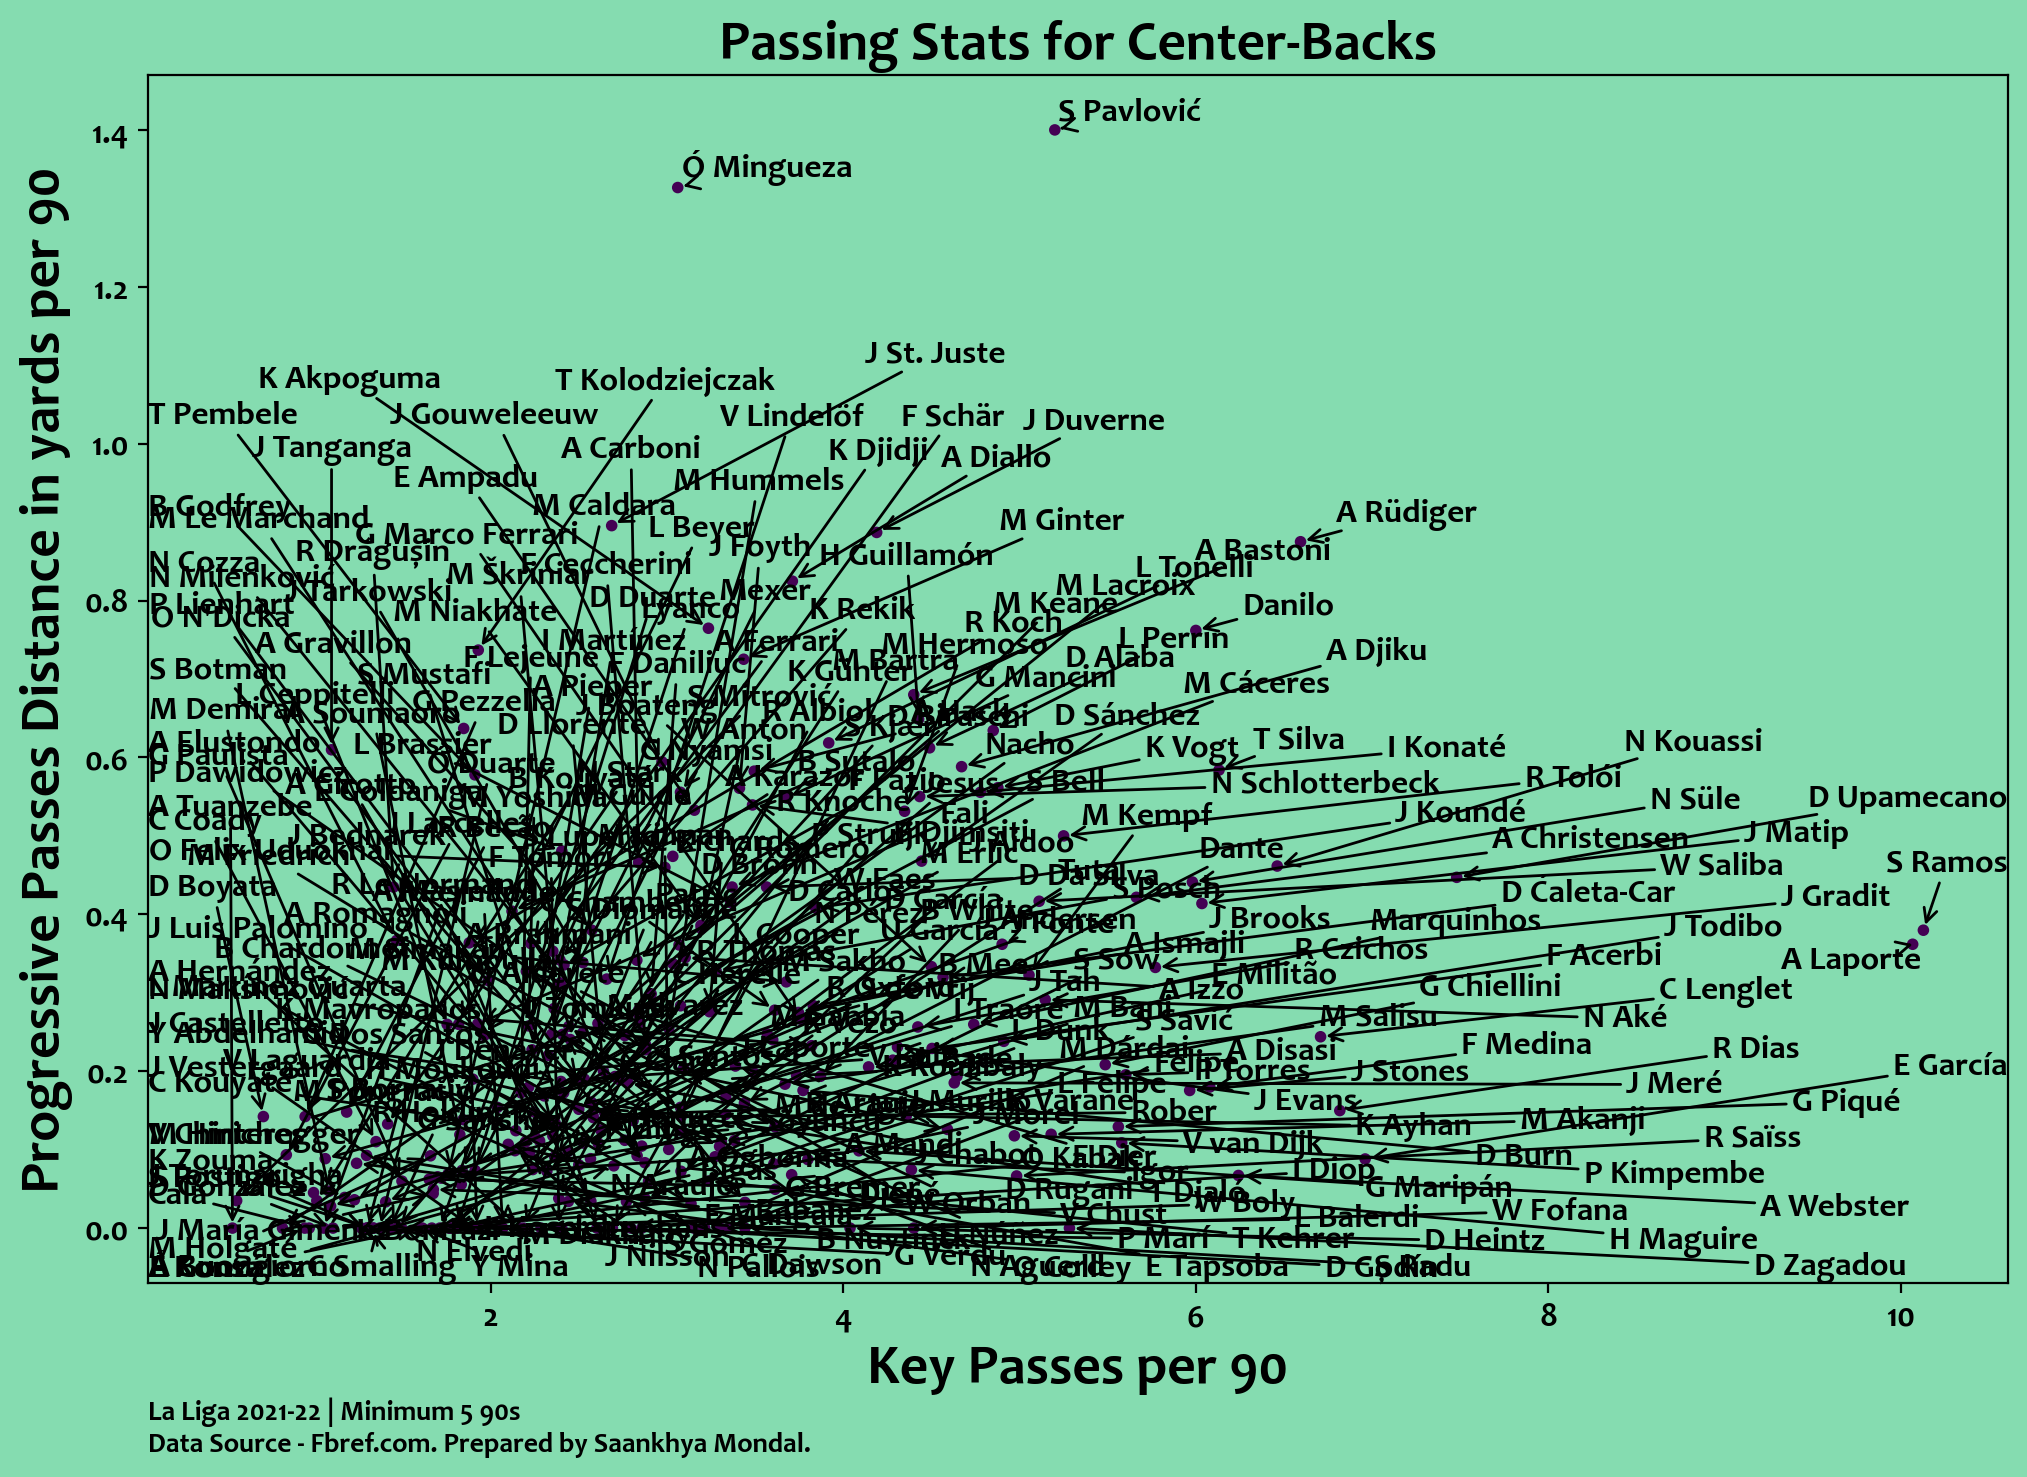

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.set_facecolor('#85dcb0')
fig.set_facecolor('#85dcb0')
fig.set_edgecolor('#85dcb0')
par_x = list(data['KPp90'])
par_y = list(data['1/3p90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['KPp90'].astype(float).quantile(0.99)
outlier_bottom = data['KPp90'].astype(float).quantile(0.02)
outlier_right = data['1/3p90'].astype(float).quantile(0.99)
outlier_left = data['1/3p90'].astype(float).quantile(0.02)


txts = []
for i, txt in enumerate(list(data['Player'])):
    # if par_x[i]>outlier_right or par_y[i]>outlier_top or 'Alaba' in txt:
    # if 'Alaba' in txt:
    if 1:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Key Passes per 90', fontsize=20)
ax.set_ylabel('Progressive Passes Distance in yards per 90', fontsize=20)
ax.set_title('Passing Stats for Center-Backs', fontsize=20, fontdict={'weight':'heavy'})
# ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'La Liga 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [22]:
fig.savefig('Images/Passing_CB_LL.png', dpi=1000, bbox_inches='tight', facecolor=fig.get_facecolor())

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

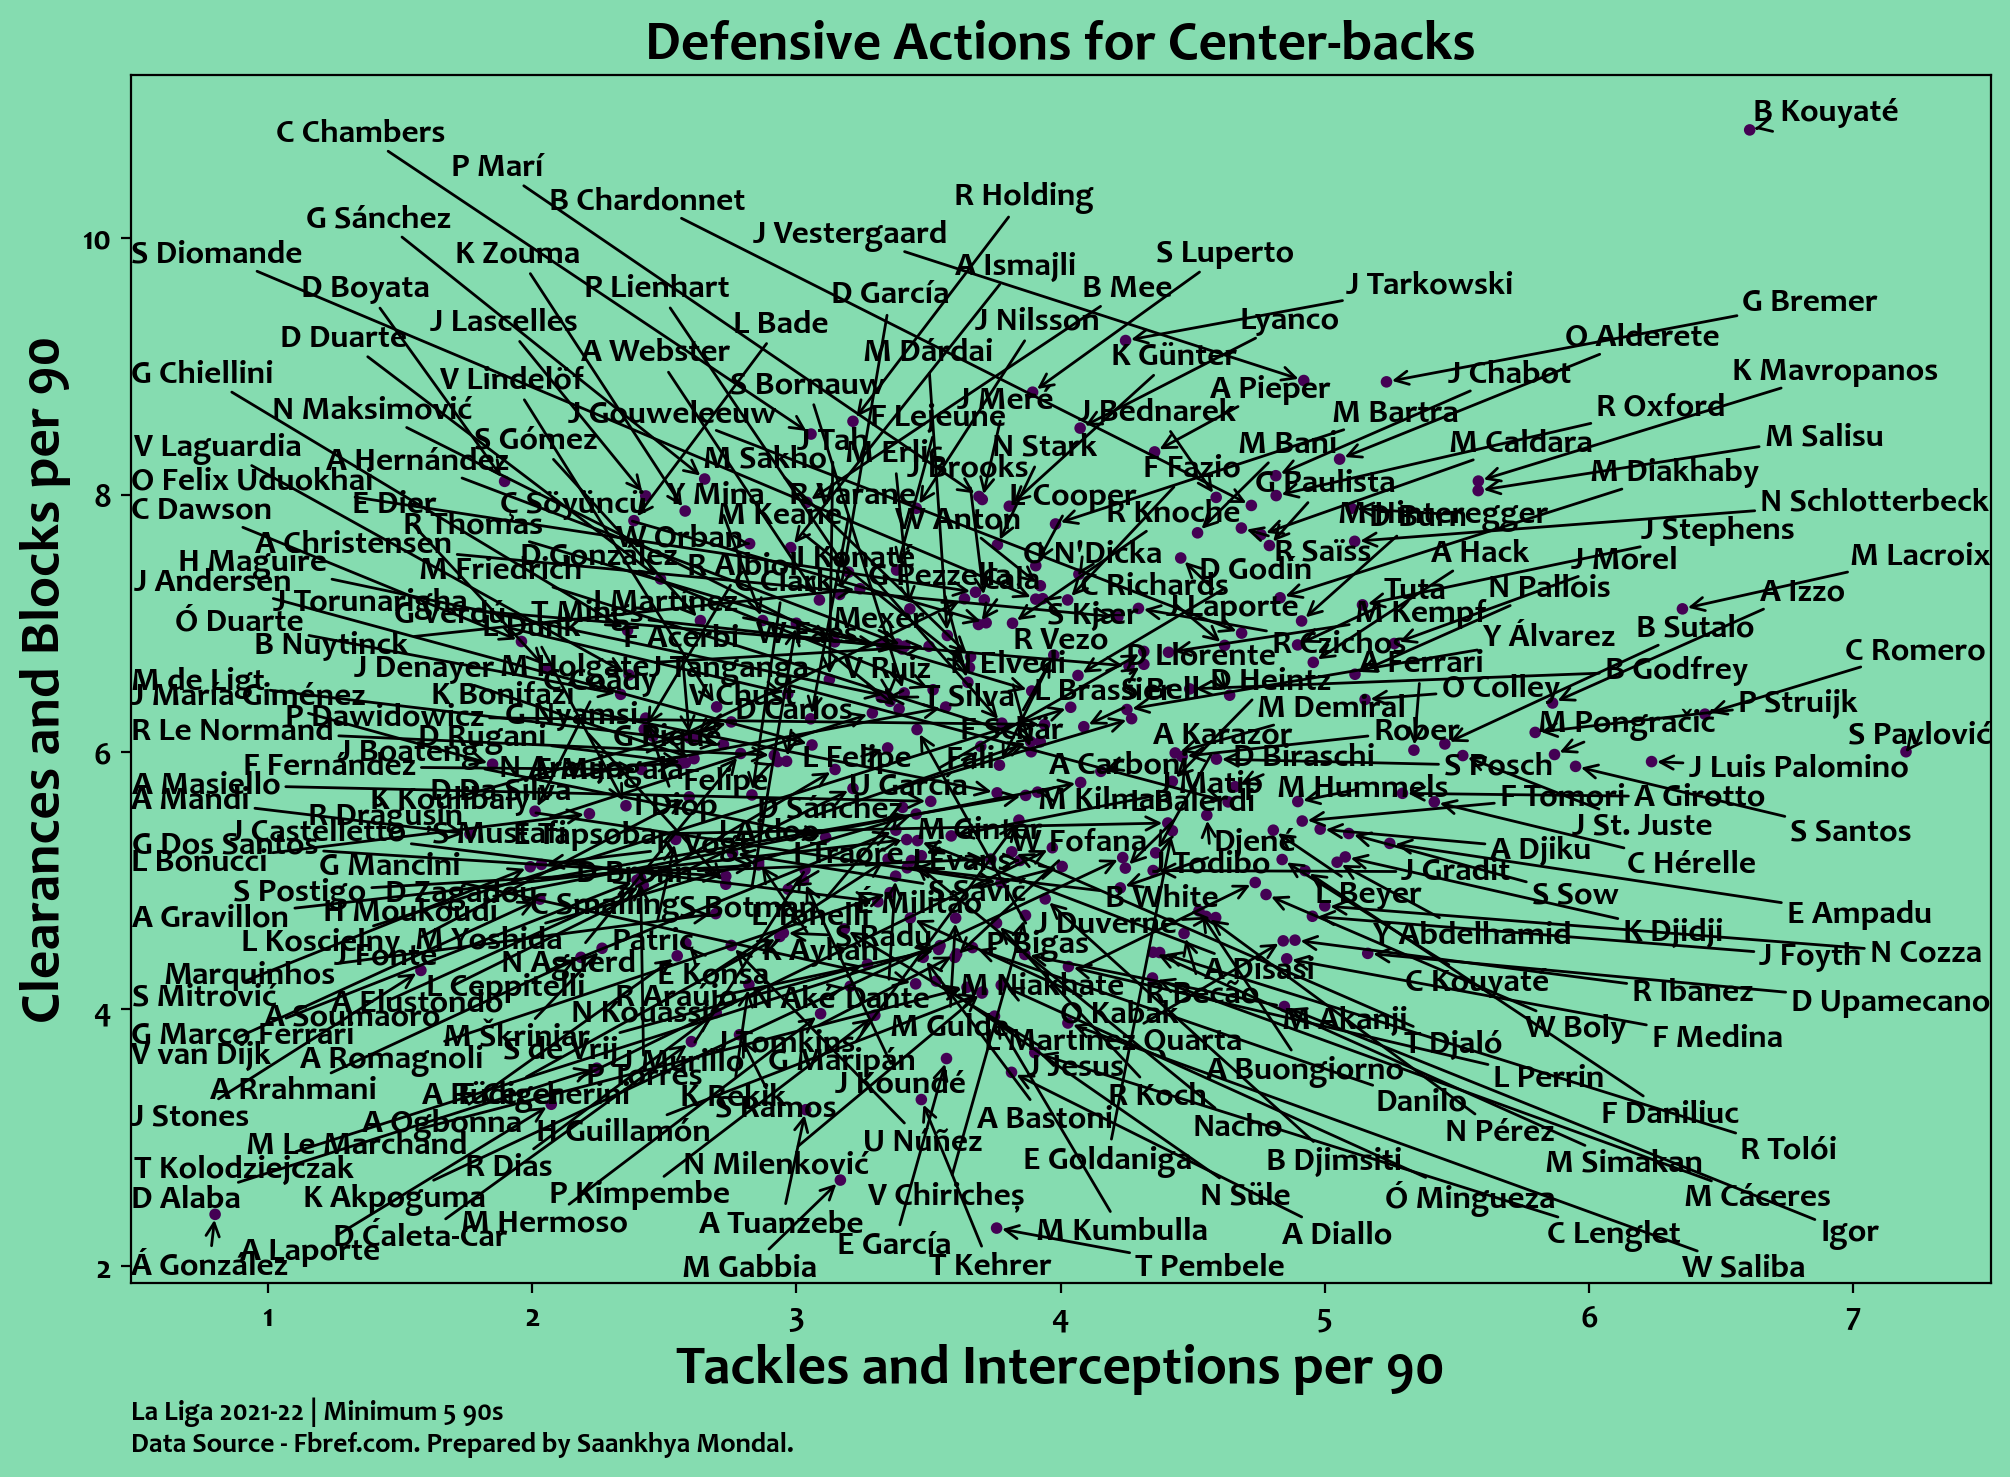

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.set_facecolor('#85dcb0')
fig.set_facecolor('#85dcb0')
fig.set_edgecolor('#85dcb0')
par_x = list(data['TAp90'])
par_y = list(data['ClrBp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['ClrBp90'].astype(float).quantile(0.90)
outlier_bottom = data['ClrBp90'].astype(float).quantile(0.02)
outlier_right = data['TAp90'].astype(float).quantile(0.90)
outlier_left = data['TAp90'].astype(float).quantile(0.02)


txts = []
for i, txt in enumerate(list(data['Player'])):
    # if par_x[i]>outlier_right or par_y[i]>outlier_top or 'Alaba' in txt or 'Eder' in txt:
    if 1:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Tackles and Interceptions per 90', fontsize=20)
ax.set_ylabel('Clearances and Blocks per 90', fontsize=20)
ax.set_title('Defensive Actions for Center-backs', fontsize=20, fontdict={'weight':'heavy'})
# ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'La Liga 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [24]:
fig.savefig('Images/DefensiveActions_CB_LL.png', dpi=1000, bbox_inches='tight', facecolor=fig.get_facecolor())

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

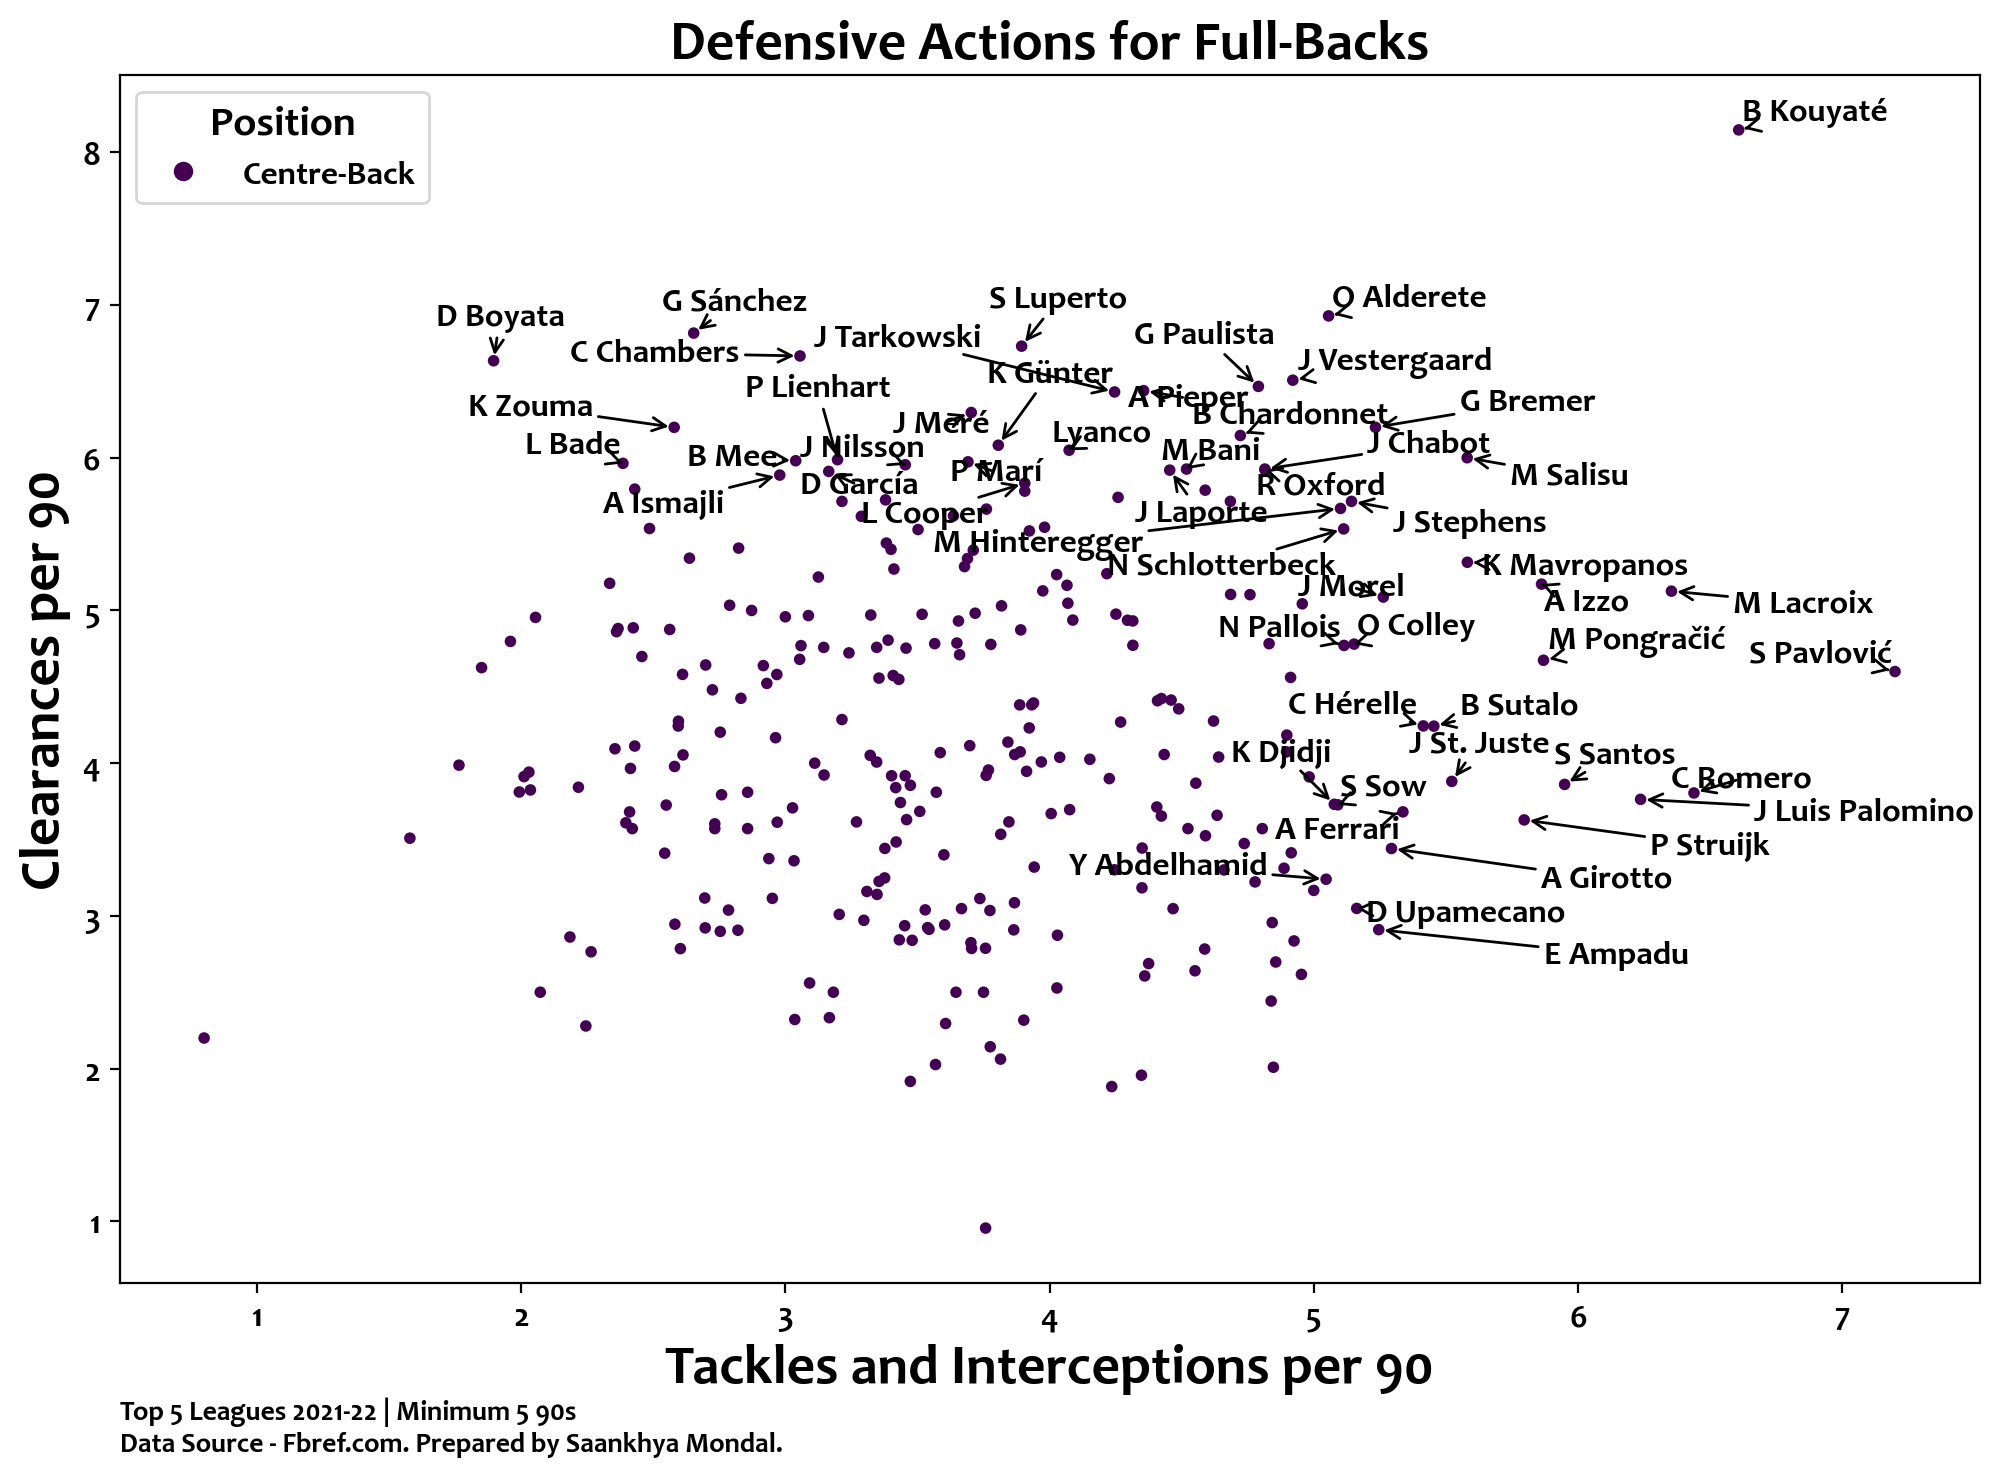

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['TAp90'])
par_y = list(data['Clrp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['Clrp90'].astype(float).quantile(0.90)
outlier_bottom = data['Clrp90'].astype(float).quantile(0.02)
outlier_right = data['TAp90'].astype(float).quantile(0.90)
outlier_left = data['TAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Tackles and Interceptions per 90', fontsize=20)
ax.set_ylabel('Clearances per 90', fontsize=20)
ax.set_title('Defensive Actions for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [26]:
fig.savefig('Images/DefensiveActions_FB.png', dpi=400, bbox_inches='tight')

In [27]:
data = data[data['90s']>=5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data

Empty DataFrame
Columns: [S. No., Player, Position, Nation, Pos, Squad, Comp, Age, Born, 90s, Tkl, TklW, Def 3rd, Mid 3rd, Att 3rd, Tkl.1, Att_x, Tkl%, Past, Press, Succ, %, Def 3rd.1, Mid 3rd.1, Att 3rd.1, Blocks, Sh_x, ShSv, Pass, Int, Tkl+Int, Clr, Err, Gls, Sh_y, SoT, SoT%, Sh/90, SoT/90, G/Sh, G/SoT, Dist, FK, PK, PKatt, xG, npxG, npxG/Sh, G-xG, np:G-xG, Cmp, Att_y, Cmp%, TotDist, PrgDist, Cmp.1, Att.1, Cmp%.1, Cmp.2, Att.2, Cmp%.2, Cmp.3, Att.3, Cmp%.3, Ast, xA, A-xA, KP, 1/3, PPA, CrsPA, Prog, TAp90, Clrp90, Bp90, ClrBp90, KPp90, 1/3p90]
Index: []

[0 rows x 78 columns]

In [28]:
data

Empty DataFrame
Columns: [S. No., Player, Position, Nation, Pos, Squad, Comp, Age, Born, 90s, Tkl, TklW, Def 3rd, Mid 3rd, Att 3rd, Tkl.1, Att_x, Tkl%, Past, Press, Succ, %, Def 3rd.1, Mid 3rd.1, Att 3rd.1, Blocks, Sh_x, ShSv, Pass, Int, Tkl+Int, Clr, Err, Gls, Sh_y, SoT, SoT%, Sh/90, SoT/90, G/Sh, G/SoT, Dist, FK, PK, PKatt, xG, npxG, npxG/Sh, G-xG, np:G-xG, Cmp, Att_y, Cmp%, TotDist, PrgDist, Cmp.1, Att.1, Cmp%.1, Cmp.2, Att.2, Cmp%.2, Cmp.3, Att.3, Cmp%.3, Ast, xA, A-xA, KP, 1/3, PPA, CrsPA, Prog, TAp90, Clrp90, Bp90, ClrBp90, KPp90, 1/3p90]
Index: []

[0 rows x 78 columns]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 78 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   S. No.     0 non-null      int64 
 1   Player     0 non-null      object
 2   Position   0 non-null      object
 3   Nation     0 non-null      object
 4   Pos        0 non-null      object
 5   Squad      0 non-null      object
 6   Comp       0 non-null      object
 7   Age        0 non-null      object
 8   Born       0 non-null      object
 9   90s        0 non-null      object
 10  Tkl        0 non-null      object
 11  TklW       0 non-null      object
 12  Def 3rd    0 non-null      object
 13  Mid 3rd    0 non-null      object
 14  Att 3rd    0 non-null      object
 15  Tkl.1      0 non-null      object
 16  Att_x      0 non-null      object
 17  Tkl%       0 non-null      object
 18  Past       0 non-null      object
 19  Press      0 non-null      object
 20  Succ       0 non-null      object
 21  %    

In [30]:
new_data = data[['Player', '90s', 'Tkl', 'TklW', 'Past', 'Press', 'Succ', 'Blocks', 'Int', 'Clr', 'Gls', 'Sh_y', 'SoT', 'xG', 'PrgDist', 'Ast', 'xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']]
new_data.iloc[:, 2:] = new_data.iloc[:, 2:].div(new_data['90s'], axis=0)
new_data.drop(columns=['90s'], inplace=True)
new_data = new_data.drop_duplicates(subset='Player')
new_data

c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

Empty DataFrame
Columns: [Player, Tkl, TklW, Past, Press, Succ, Blocks, Int, Clr, Gls, Sh_y, SoT, xG, PrgDist, Ast, xA, KP, 1/3, PPA, CrsPA, Prog]
Index: []

[0 rows x 21 columns]

In [31]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

In [32]:
x = new_data.iloc[:, 1:].astype(float)

In [33]:
x = np.array(x)
x = (x - np.mean(x, axis=0))/np.std(x, axis=0)

c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\numpy\core\_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [34]:
n_cluster = 2
kmeans = KMeans(n_clusters=n_cluster, max_iter=10000).fit(x)
gmm = GaussianMixture(n_components=n_cluster, max_iter=10000).fit(x)

ValueError: Found array with 0 sample(s) (shape=(0, 20)) while a minimum of 1 is required.

In [ ]:
y_km = kmeans.labels_
y_km

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
y_gmm = gmm.predict(x)
y_gmm

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=5000, learning_rate=200)
z = tsne.fit_transform(x)

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 242 samples in 0.000s...
[t-SNE] Computed neighbors for 242 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 242 / 242
[t-SNE] Mean sigma: 1.921877
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.014973
[t-SNE] KL divergence after 900 iterations: 0.673196


In [ ]:
data = pd.DataFrame()
data['Player'] = new_data['Player']
data['y_km'] = y_km
data['y_gmm'] = y_gmm
data["Component-1"] = z[:,0]
data["Component-2"] = z[:,1]

In [ ]:
data

Player  y_km  y_gmm  Component-1  Component-2
7             Marcos Acuña     0      0     6.408015    -2.648758
12    Martin Agirregabiria     1      1    -1.563400    -1.957718
17           Ruben Aguilar     1      1    -1.186428     6.854680
21                Ola Aina     1      0     0.720896    -3.823021
22         Rayan Aït Nouri     1      1    -0.635745     5.455352
...                    ...   ...    ...          ...          ...
1836         Joseba Zaldúa     1      1    -2.999595    -1.825689
1840        Gabriele Zappa     1      1    -0.608423    -2.949683
1841     Davide Zappacosta     0      1     3.643183    -6.425168
1844    Deyovaisio Zeefuik     1      1    -4.417544     0.717442
1851   Oleksandr Zinchenko     0      0     6.820018    -0.775534

[242 rows x 5 columns]

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

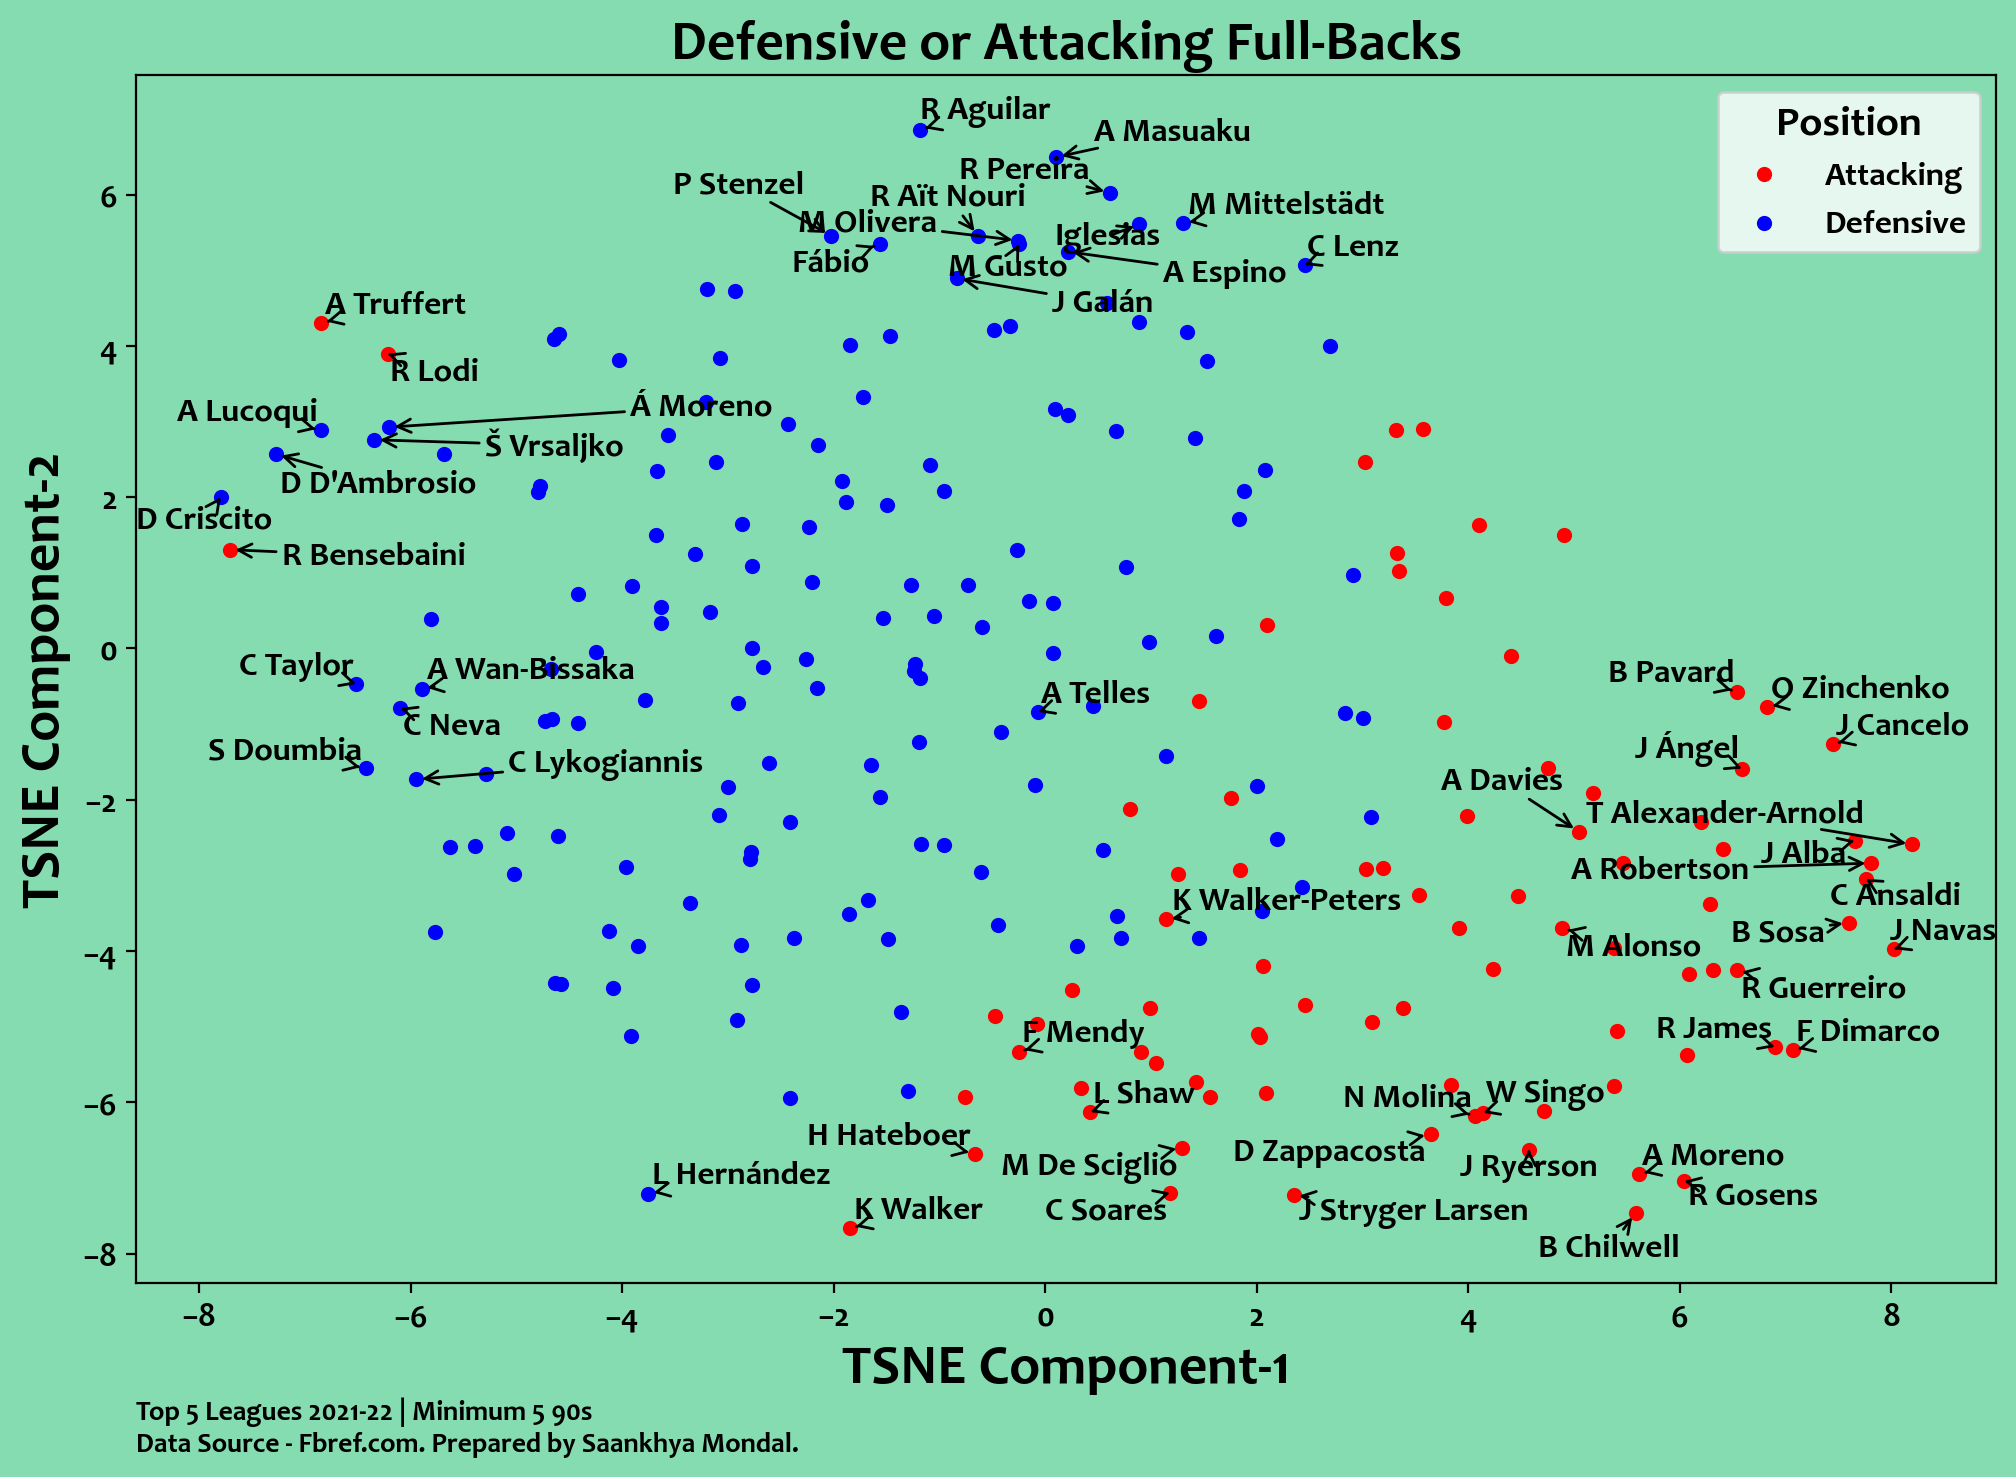

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.set_facecolor('#85dcb0')
fig.set_facecolor('#85dcb0')
fig.set_edgecolor('#85dcb0')
par_x = list(data['Component-1'])
par_y = list(data['Component-2'])
colors = {0:'red', 1:'blue'}
grouped = data.groupby('y_km')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Component-1', y='Component-2', label=key, color=colors[key])

outlier_top = data['Component-2'].astype(float).quantile(0.95)
outlier_bottom = data['Component-2'].astype(float).quantile(0.05)
outlier_right = data['Component-1'].astype(float).quantile(0.95)
outlier_left = data['Component-1'].astype(float).quantile(0.05)

fbs = ['Walker', 'Alba', 'Zinchenko', 'Mendy', 'Alonso', 'Robertson', 'Trent', 'Reece', 'Wan-Bissaka', 'Shaw', 'Telles', 'Alphonso']

def check_name_present(name):
    for i in fbs:
        if i in name:
            return True
    return False

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_x[i]<outlier_left or par_y[i]>outlier_top or par_y[i]<outlier_bottom or check_name_present(txt):
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('TSNE Component-1', fontsize=20)
ax.set_ylabel('TSNE Component-2', fontsize=20)
ax.set_title('Defensive or Attacking Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(labels=['Attacking', 'Defensive'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [ ]:
fig.savefig('Images/TSNE-Viz-K-Means-Cluster_FB.png', dpi=1000, bbox_inches='tight', facecolor=fig.get_facecolor())

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

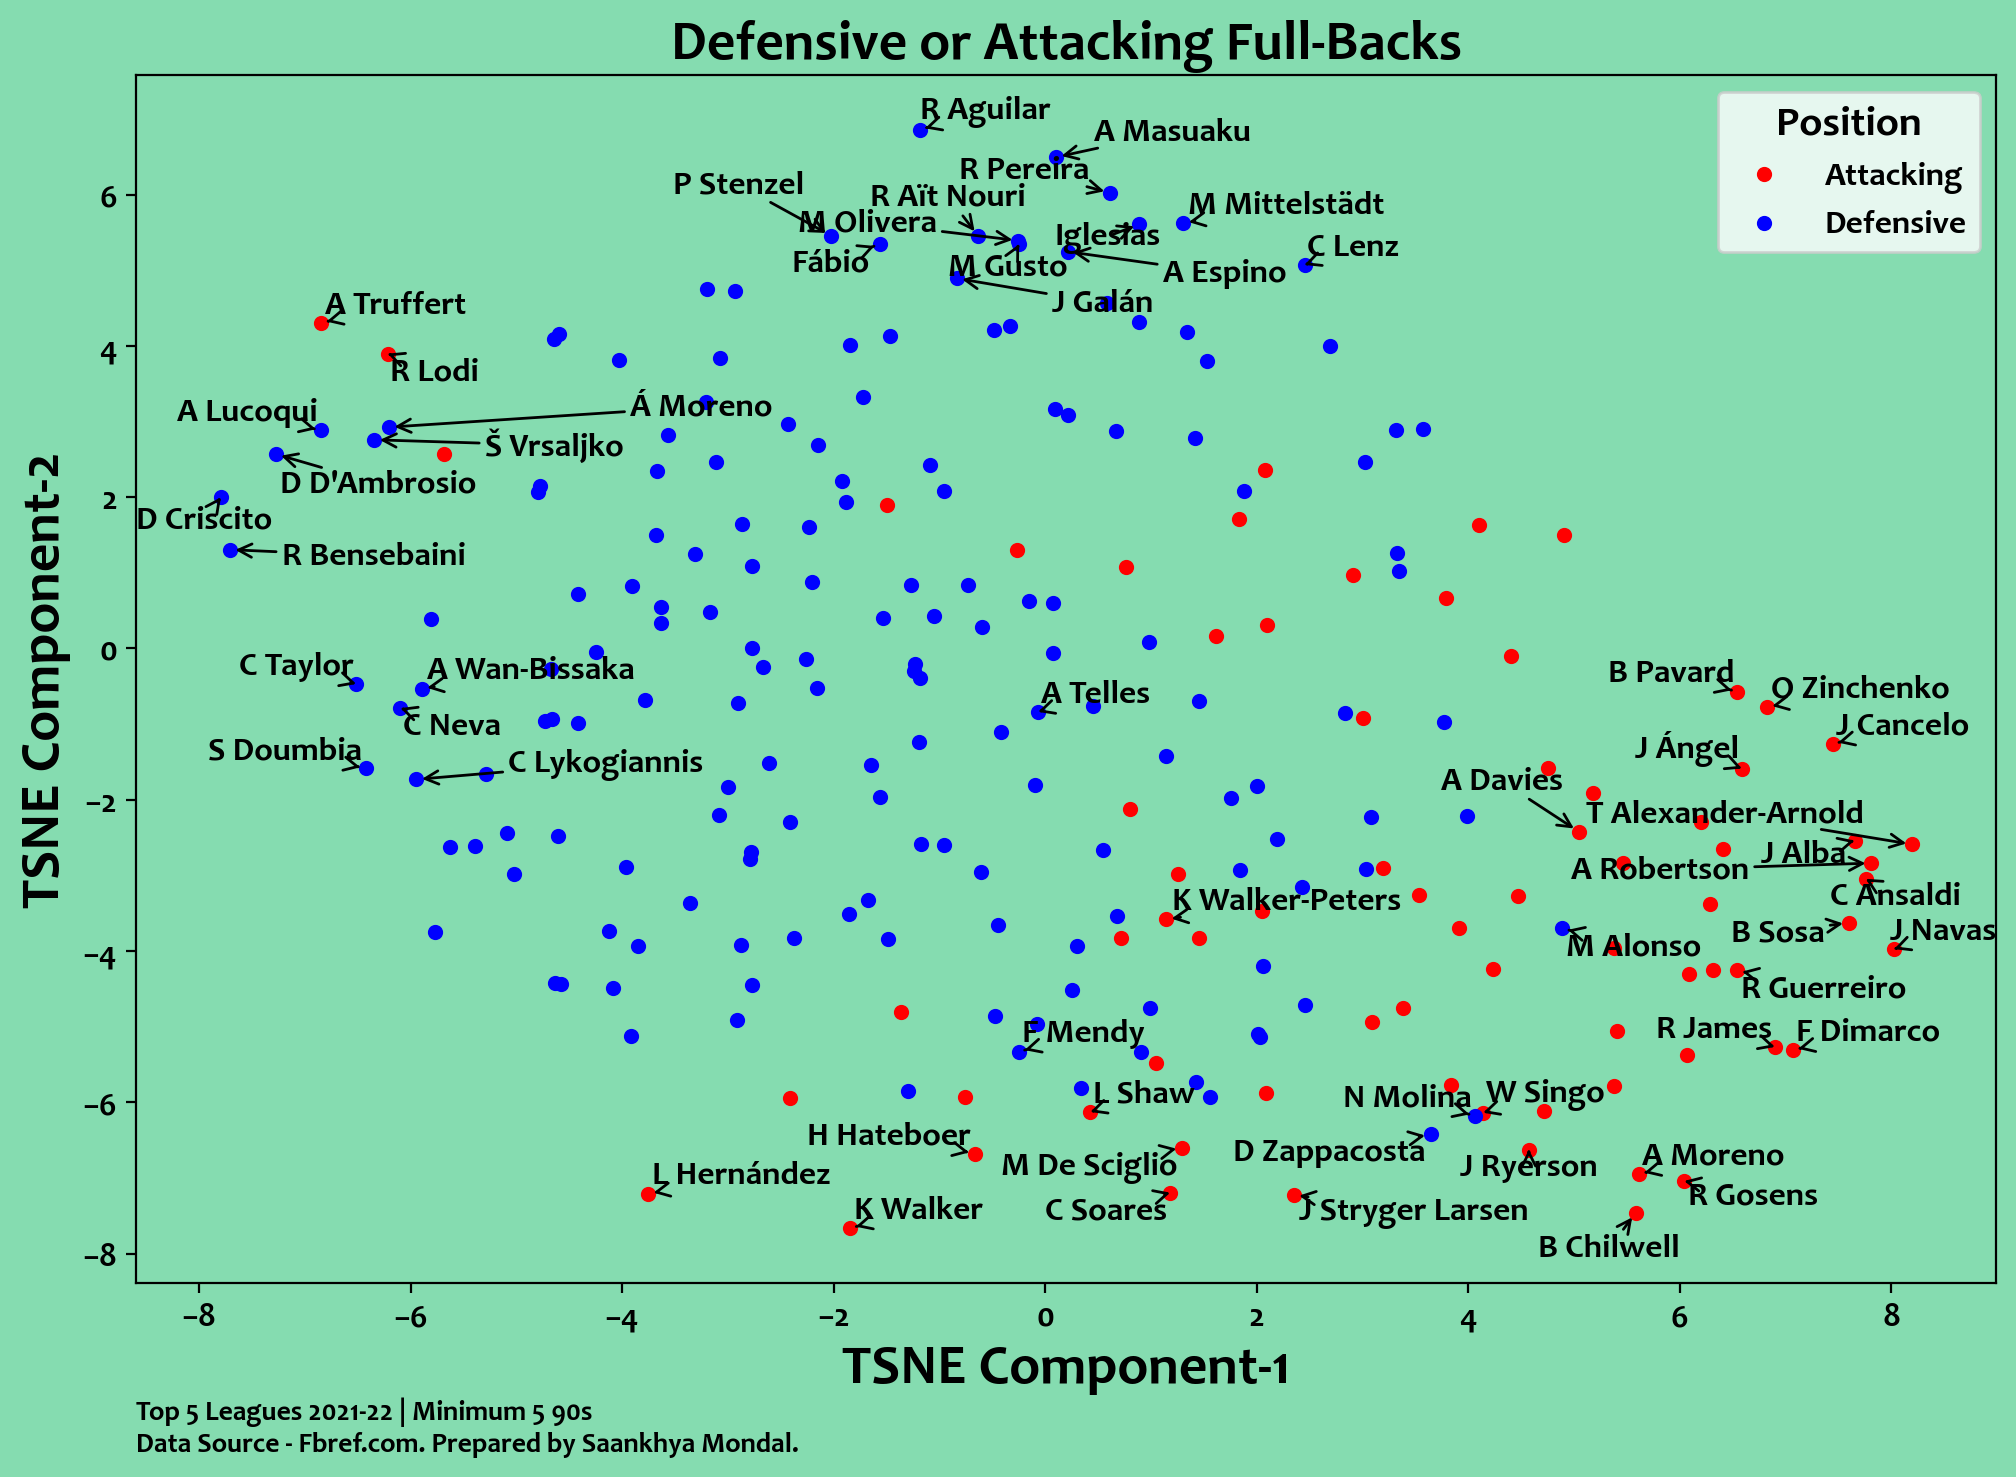

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.set_facecolor('#85dcb0')
fig.set_facecolor('#85dcb0')
fig.set_edgecolor('#85dcb0')
par_x = list(data['Component-1'])
par_y = list(data['Component-2'])
colors = {0:'red', 1:'blue'}
grouped = data.groupby('y_gmm')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Component-1', y='Component-2', label=key, color=colors[key])


outlier_top = data['Component-2'].astype(float).quantile(0.95)
outlier_bottom = data['Component-2'].astype(float).quantile(0.05)
outlier_right = data['Component-1'].astype(float).quantile(0.95)
outlier_left = data['Component-1'].astype(float).quantile(0.05)

fbs = ['Walker', 'Alba', 'Zinchenko', 'Mendy', 'Alonso', 'Robertson', 'Trent', 'Reece', 'Wan-Bissaka', 'Shaw', 'Telles', 'Alphonso']

def check_name_present(name):
    for i in fbs:
        if i in name:
            return True
    return False

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_x[i]<outlier_left or par_y[i]>outlier_top or par_y[i]<outlier_bottom or check_name_present(txt):
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('TSNE Component-1', fontsize=20)
ax.set_ylabel('TSNE Component-2', fontsize=20)
ax.set_title('Defensive or Attacking Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(labels=['Attacking', 'Defensive'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [ ]:
fig.savefig('Images/TSNE-Viz-GMM-Cluster_FB.png', dpi=1000, bbox_inches='tight', facecolor=fig.get_facecolor())